## Analysing Titanic data set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Analysing train data

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gillespie, Mr. William Henry",male,1601,B96 B98,S
freq,1,577,7,4,644


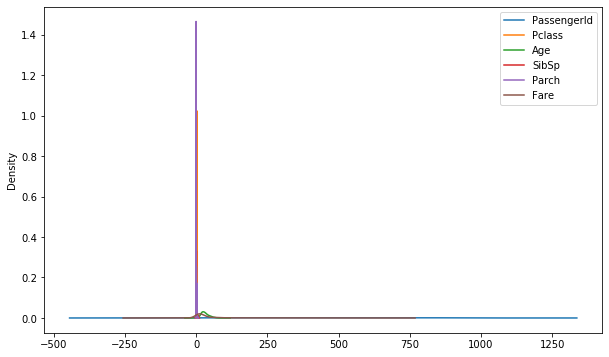

In [9]:
train.plot(x='Survived', kind='kde', figsize=(10, 6))

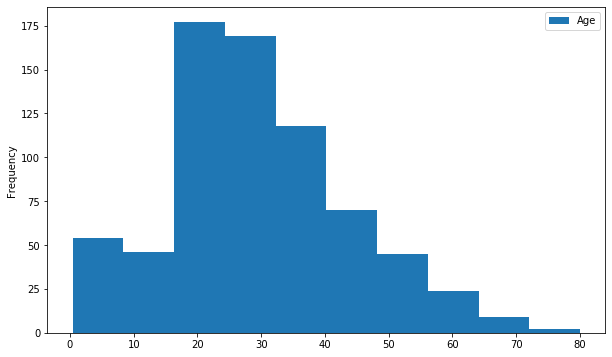

In [10]:
train.plot(x='Survived', y='Age', kind='hist', figsize=(10, 6))

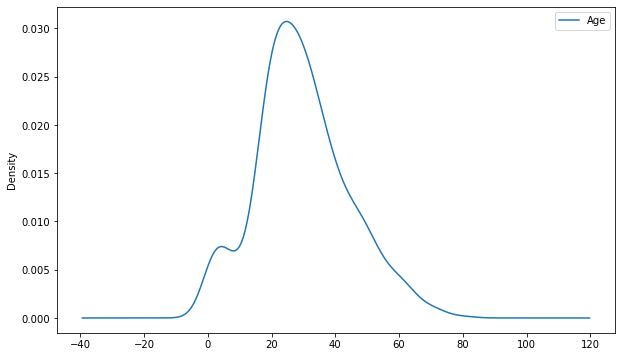

In [11]:
train.plot(x='Survived', y='Age', kind='kde', figsize=(10, 6))

## Analyzing features coorelation

> At this stage, It only make sense only for features which do not have any empty values and also are categorical 

* Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived
                                                                                
* Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74%

* SibSp and Parch These features have zero correlation for certain values.


In [12]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


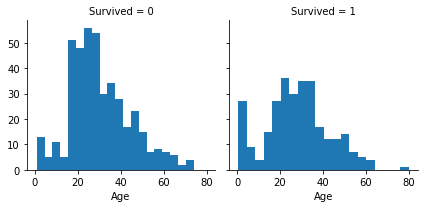

In [16]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

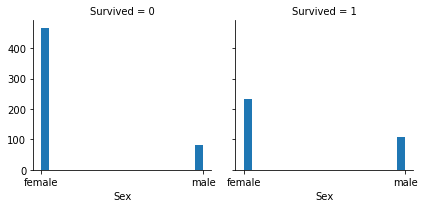

In [17]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Sex', bins=20)

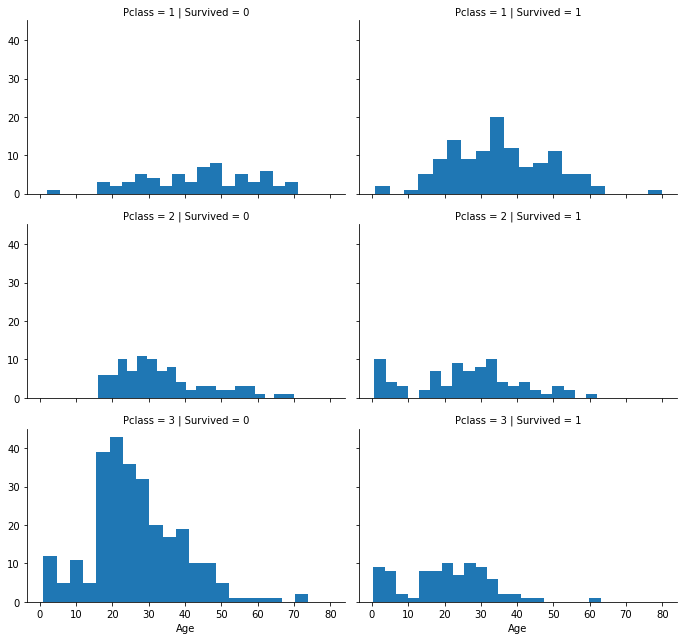

In [18]:
g = sns.FacetGrid(train, col='Survived', row='Pclass', aspect=1.6)
g.map(plt.hist, 'Age', bins=20)

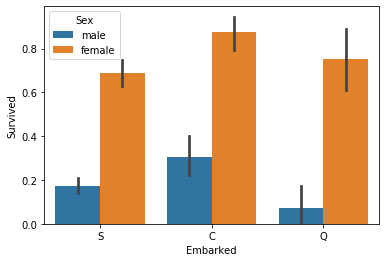

In [19]:
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=train)

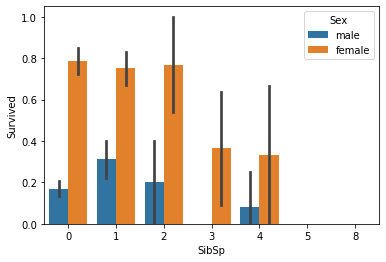

In [20]:
sns.barplot(x='SibSp', y='Survived', hue='Sex', data=train)

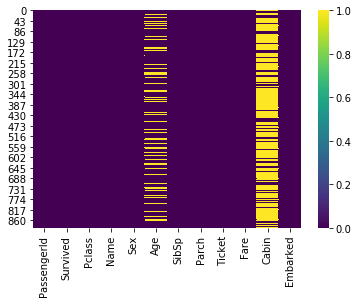

In [21]:
sns.heatmap(train.isnull(), cmap='viridis')

## Now we'll try to extract title feature using Regular Expression
____

### We could try to retain the title feature for model training

In [22]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

# combine = pd.DataFrame([train, test])

In [23]:
combine = [train, test]

In [24]:
combine[0].shape

(891, 10)

In [25]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


> We can replace many titles with a more common name or classify them as Rare. Caause most of them are rarely used

In [26]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', \
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mlle,1.000000
3,Mme,1.000000
4,Mr,0.156673
5,Mrs,0.792000
6,Ms,1.000000
7,Rare,0.347826


### Now, as we've sortlisted the title, we can convert the categorical title to ordinal

In [27]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [28]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,3.0


> As we've got the title now, we can drop some of the columns for taining and testing sets

In [29]:
train = train.drop(['Name', 'PassengerId', 'Fare'], axis=1)
test = test.drop(['Name', 'PassengerId', 'Fare'], axis=1)

combine = [train, test]
train.shape, test.shape

((891, 8), (418, 7))

In [30]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

> Let us create Age bands and determine correlations with Survived

In [31]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [32]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,S,1.0,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,C,3.0,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,S,2.0,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,S,3.0,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,S,1.0,"(32.252, 48.168]"


In [33]:
train = train.drop(['AgeBand'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,0,3,0,1.0,1,0,S,1.0
1,1,1,1,2.0,1,0,C,3.0
2,1,3,1,1.0,0,0,S,2.0
3,1,1,1,2.0,1,0,S,3.0
4,0,3,0,2.0,0,0,S,1.0


In [34]:
## removing unwanted columns

train = train.drop(['Parch', 'SibSp'], axis=1)
test = test.drop(['Parch', 'SibSp'], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Embarked,Title
0,0,3,0,1.0,S,1.0
1,1,1,1,2.0,C,3.0
2,1,3,1,1.0,S,2.0
3,1,1,1,2.0,S,3.0
4,0,3,0,2.0,S,1.0


In [35]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
Title         0
dtype: int64

## Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values.

In [36]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [37]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [38]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      0
Title         0
dtype: int64

In [39]:
# Mapping Embarked categorical values

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

train.head()

,Survived,Pclass,Sex,Age,Embarked,Title
0,0,3,0,1.0,0,1.0
1,1,1,1,2.0,1,3.0
2,1,3,1,1.0,0,2.0
3,1,1,1,2.0,0,3.0
4,0,3,0,2.0,0,1.0


## Model, predict and solve

#### Now we are ready to train model and predict required solution

In [40]:
def fillna_age(cols):
    age = cols[0]
    p_class = cols[1]

    if pd.isnull(age):
        if p_class == 1:
            return 37
        elif p_class == 2:
            return 29
        else:
            return 24
    else:
        return age

train['Age'] = train[['Age', 'Pclass']].apply(fillna_age, axis=1)

In [41]:
## Filling blank Age's based on PClass value

In [42]:
test['Age'] = test[['Age', 'Pclass']].apply(fillna_age, axis=1)

In [43]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 5), (891,), (418, 5))

In [44]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
y_pred = log_reg.predict(X_test)

accuracy = round(log_reg.score(X_train, Y_train) * 100, 2)
accuracy

79.46

In [45]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(log_reg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.167383
3,Embarked,0.398346
4,Title,0.362859
2,Age,-0.017051
0,Pclass,-0.950196


In [46]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
models = []

models.append(('SVC', SVC()))
models.append(('LinearSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTree', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))

In [48]:
for name, model in models:
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    
    acc_score_classifier = round(model.score(X_train, Y_train) * 100, 2)
    
    print(f'Score of {name} is {acc_score_classifier}')

Score of SVC is 75.87
Score of LinearSVC is 77.89
Score of RFC is 84.62
Score of KNN is 73.06
Score of DTree is 84.62
Score of GaussianNB is 78.34
